# Wilt Data Set
Датасет содержит некоторые данные из исследования дистанционного зондирования Johnson (2013 года). В таблице содержится информация о 4889ти объектах(деревьях). Основной задача: классификация объектов. Дерево относится либо к классу "w"(дерево больное), либо к "n"(другой растительный покров).
Аттрибуты:
class: w (больное дерево), n (другой растительный покров)
GLCM_Pan: диапазон GLCM (диапазон значений яркости пикселя)
Mean_G: объем зеленого (предположительно листвы)
Mean_R: объем красного (предположительно листвы)
Mean_NIR: значение запасов
SD_Pan: стандартное отклонение 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Подгружаем библиотеки

In [2]:
data = pd.read_csv('training.csv', sep = ',', engine = 'python')

In [3]:
print(data.shape)

(4339, 6)


Посмотрим, сколько же столбцов и строк данных нам досталось в тренировочной выборке. 6 столбцов(атрибуты) и 4339 строк(сами объекты)

In [4]:
data

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193
5,w,118.347962,226.150000,138.850000,608.900000,29.072797
6,w,135.436282,184.500000,95.142857,309.190476,13.055264
7,w,121.169643,226.000000,146.214286,595.571429,22.808542
8,w,131.127161,232.784314,144.588235,563.843137,11.948563
9,w,134.498092,210.212121,116.909091,594.848485,27.937685


In [5]:
data.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193


Поэкспериментируем и посмотрим на первые 5 строк таблицы

In [6]:
data.tail()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
4334,n,111.568773,203.588235,93.264706,403.735294,26.512777
4335,n,125.435240,206.394161,93.058394,512.270073,33.466060
4336,n,132.123859,465.343750,295.333333,499.250000,38.762967
4337,n,124.469536,215.152632,98.484211,675.915789,28.506542
4338,n,125.171928,559.048000,365.968000,439.272000,15.392322


Уделим внимание и последним 5ти строкам таблицы

In [7]:
type(data)

pandas.core.frame.DataFrame

Посмотрим на тип данных, с которыми будем работать

In [8]:
type(data['SD_pan'])

pandas.core.series.Series

Например, посмотрим на SD_PAN

In [9]:
print(data.columns)

Index([u'class', u'GLCM_pan', u'Mean_Green', u'Mean_Red', u'Mean_NIR',
       u'SD_pan'],
      dtype='object')


Посмотрим название столбцов(они и так видны, но мы же знаем, как можно просто вызвать одну функцию)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
class         4339 non-null object
GLCM_pan      4339 non-null float64
Mean_Green    4339 non-null float64
Mean_Red      4339 non-null float64
Mean_NIR      4339 non-null float64
SD_pan        4339 non-null float64
dtypes: float64(5), object(1)
memory usage: 203.5+ KB


Теперь посмотрим общую информацию о нашей обучающей выборке. Мы видим, что пустые ячейки у нас отсутствуют(это замечательно).

In [11]:
data.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,126.831298,233.906908,117.292439,534.104683,24.924588
std,13.735836,60.757687,60.711159,154.495500,11.008303
min,0.000000,164.625000,59.142857,86.500000,0.000000
25%,118.589080,206.000000,91.975244,422.875000,18.009143
50%,127.479167,221.454545,101.727273,528.500000,23.612444
75%,135.043591,241.791304,116.866071,643.087037,29.899148
max,183.281250,955.714286,746.333333,1005.516129,156.508431


Теперь стоит посмотреть общие статистические характеристики наших количественных признаков. Как видно, здесь отсутствует столбец с классом (т.к. этот признак не является количественным)

In [12]:
data.describe(include = 'all')

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4339,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
unique,2,NaN,NaN,NaN,NaN,NaN
top,n,NaN,NaN,NaN,NaN,NaN
freq,4265,NaN,NaN,NaN,NaN,NaN
mean,NaN,126.831298,233.906908,117.292439,534.104683,24.924588
std,NaN,13.735836,60.757687,60.711159,154.495500,11.008303
min,NaN,0.000000,164.625000,59.142857,86.500000,0.000000
25%,NaN,118.589080,206.000000,91.975244,422.875000,18.009143
50%,NaN,127.479167,221.454545,101.727273,528.500000,23.612444
75%,NaN,135.043591,241.791304,116.866071,643.087037,29.899148


Если мы допишем include = 'all', можно будет посмотреть статистику по всем-всем признакам(новая табличка будет иметь пустые поля(NaN), так как разные типы данных имеют разные характеристики)

In [13]:
data.corr()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
GLCM_pan,1.000000,-0.122384,-0.107166,-0.094263,-0.065023
Mean_Green,-0.122384,1.000000,0.964682,0.223518,0.246103
Mean_Red,-0.107166,0.964682,1.000000,0.121230,0.254383
Mean_NIR,-0.094263,0.223518,0.121230,1.000000,0.120276
SD_pan,-0.065023,0.246103,0.254383,0.120276,1.000000


Стоит посмотреть на таблицу корреляции между признаками. Видим сильную корреляцию между признаками Mean_Green и Mean_Red (высокий корреляционный коэфициент=0.96...)

In [14]:
data[data["class"] == 'w'].corr()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
GLCM_pan,1.000000,-0.308103,-0.395809,-0.078710,-0.301669
Mean_Green,-0.308103,1.000000,0.934136,0.793182,0.504750
Mean_Red,-0.395809,0.934136,1.000000,0.664420,0.497196
Mean_NIR,-0.078710,0.793182,0.664420,1.000000,0.583885
SD_pan,-0.301669,0.504750,0.497196,0.583885,1.000000


Посмотрим корреляцию признаков для больных деревьев(класс W)

In [15]:
data[data["class"] == 'n'].corr()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
GLCM_pan,1.000000,-0.121066,-0.106399,-0.093080,-0.062997
Mean_Green,-0.121066,1.000000,0.967065,0.216821,0.242798
Mean_Red,-0.106399,0.967065,1.000000,0.120114,0.254281
Mean_NIR,-0.093080,0.216821,0.120114,1.000000,0.112734
SD_pan,-0.062997,0.242798,0.254281,0.112734,1.000000


А узнаем теперь, какая корреляция между признаками у объектов которые относятся к классу других растительных объектов(класс N)
Заметим, что для больных деревьев корреляция между признаками Mean_Green и Mean_NIR значительно выше, чем для остальных растительных объектов.

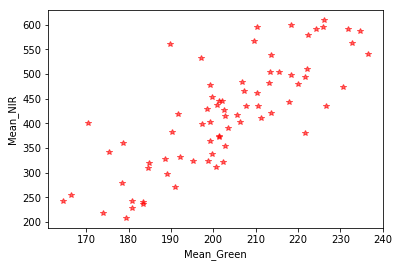

In [16]:
plt.plot(data[data["class"]=='w']['Mean_Green'], data[data["class"]=='w']['Mean_NIR'], '*', color = 'red', alpha = 0.6)
plt.xlabel('Mean_Green')
plt.ylabel('Mean_NIR')
pass

Для удобства построим простую диаграмму рассеяния для класса больных деревьев для параметров:объем зеленой растительности(Mean_Green) и Mean_NIR.

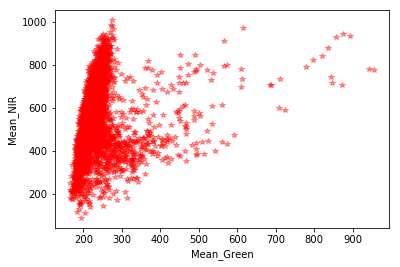

In [17]:
plt.plot(data[data["class"]=='n']['Mean_Green'], data[data["class"]=='n']['Mean_NIR'], '*', color = 'red', alpha = 0.4)
plt.xlabel('Mean_Green')
plt.ylabel('Mean_NIR')
pass

Аналогичный график построим и для объектов из класса других растений. Заметим, что для многих объектов из этого класса характерно невысокое(относительно невысокое) значение Mean_Green и при этом различные значения Mean_NIR.

In [18]:
(data['Mean_Green'] > 250).head()

0    False
1    False
2    False
3    False
4    False
Name: Mean_Green, dtype: bool

Выведем первые 5 объектов, для которых значение Mean_Green больше 250

In [19]:
data['class'].unique()

array(['w', 'n'], dtype=object)

Выведем уникальные значения для столбца Класс. Замечаем, что у нас всего два уникальных значения для этого столбца

In [20]:
data['Mean_Green'].min()

164.625

Посмотрим минимальное значение для столбца Mean_Green

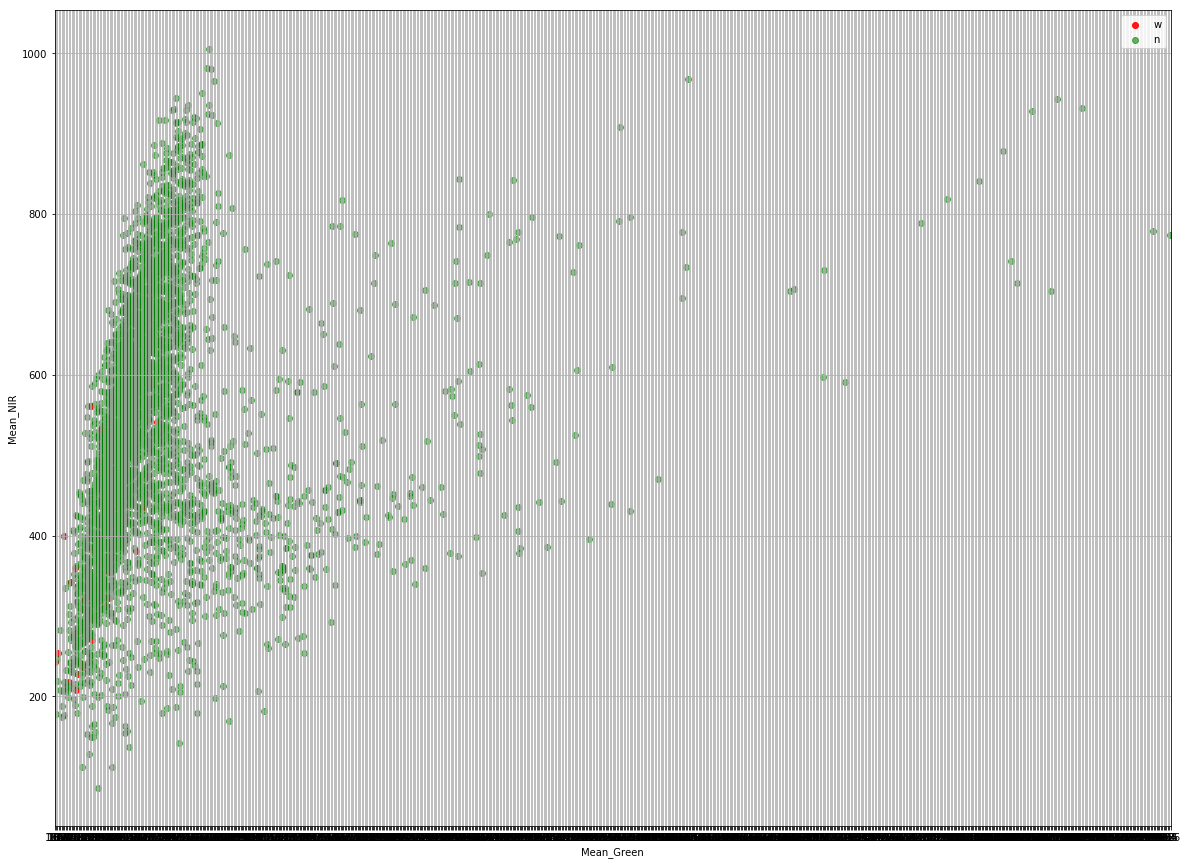

In [21]:
plt.figure(figsize = (20, 15))

plt.scatter(data[data['class'] == 'w']['Mean_Green'],
            data[data['class'] == 'w']['Mean_NIR'],
            alpha = 0.9,
            label = 'w',
            color = 'r')

plt.scatter(data[data['class'] == 'n']['Mean_Green'],
            data[data['class'] == 'n']['Mean_NIR'],
            alpha = 0.6,
            label = 'n',
            color = 'g')

plt.xlabel('Mean_Green')
plt.xticks(range(85, 1006))
plt.xlim(164, 956)
plt.ylabel('Mean_NIR')
plt.legend()
plt.grid()

In [22]:
data['SD_pan'].unique().shape

(4311L,)

In [24]:
data['SD_pan'].shape

(4339L,)

Посмотрим, нет ли повторяющихся значений SD_pan для разных объектов. Для этого сравним количество уникальных значений поля и количество всех значений. Понимаем, что есть повторяющиеся значения SD_pan у каких-то элементов датасета.

In [25]:
y = np.array([1 if it == 'w' else 0 for it in data['class']])

Поскольку классов у нас всего два, вполне удобно и практично будет сделать этот признак бинарным: 1, если дерево больно(класс w), в остальных случаях 0.


In [26]:
data = data.drop(('class'), axis=1)

In [27]:
print(y.shape)

(4339L,)


храним выделенный признак в отдельном векторе(так удобнее.правда)

In [28]:
categorical_columns = [i for i in data.columns if data[i].dtype.name == 'object']
print(categorical_columns)

[]


Выбьем столбец с обозначение классов и узнаем, остались ли у нас такие неудобные категориальные признаки. Нет, их больше нет.

In [29]:
numerical_columns   = [i for i in data.columns if data[i].dtype.name != 'object']
print(numerical_columns)

['GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan']


Посмотрим, какие количественные признаки у нас остались.

In [30]:
data[numerical_columns].count(axis = 0)

GLCM_pan      4339
Mean_Green    4339
Mean_Red      4339
Mean_NIR      4339
SD_pan        4339
dtype: int64

Попробовали найти пропущеные значения. Их нет.

In [31]:
data.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,126.831298,233.906908,117.292439,534.104683,24.924588
std,13.735836,60.757687,60.711159,154.495500,11.008303
min,0.000000,164.625000,59.142857,86.500000,0.000000
25%,118.589080,206.000000,91.975244,422.875000,18.009143
50%,127.479167,221.454545,101.727273,528.500000,23.612444
75%,135.043591,241.791304,116.866071,643.087037,29.899148
max,183.281250,955.714286,746.333333,1005.516129,156.508431


Проверили, что все элементы таблицы заполнены

# Нормализация количественных признаков

Т.к. категориальных признаков у нас не осталось, сразу переходим к обработке количнственных признаков.

In [32]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean())
data_numerical.describe()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4.339000e+03,4.339000e+03,4.339000e+03,4.339000e+03,4.339000e+03
mean,-2.097403e-14,-6.961124e-13,-2.434546e-13,-1.898654e-12,6.409746e-14
std,1.373584e+01,6.075769e+01,6.071116e+01,1.544955e+02,1.100830e+01
min,-1.268313e+02,-6.928191e+01,-5.814958e+01,-4.476047e+02,-2.492459e+01
25%,-8.242218e+00,-2.790691e+01,-2.531719e+01,-1.112297e+02,-6.915445e+00
50%,6.478686e-01,-1.245236e+01,-1.556517e+01,-5.604683e+00,-1.312144e+00
75%,8.212293e+00,7.884397e+00,-4.263671e-01,1.089824e+02,4.974560e+00
max,5.644995e+01,7.218074e+02,6.290409e+02,4.714114e+02,1.315838e+02


Приведем каждый количественный признак к нулевому среднему и единичному среднеквадратичному отклонению

In [33]:
X = data
feature_names = X.columns

In [34]:
type(feature_names)

pandas.indexes.base.Index

In [35]:
feature_names

Index([u'GLCM_pan', u'Mean_Green', u'Mean_Red', u'Mean_NIR', u'SD_pan'], dtype='object')

для удобства разделяем блок с фитчами и выделенный признак(класс в нашем случае хранится в векторе y)

In [36]:
print(X.shape)
print(y.shape)
N, d = X.shape

(4339, 5)
(4339L,)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

(3037, 1302)


делим нашу выборку на обучающую и тестовую(70% и 30%).

# kNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

По умолчанию обычно берут отправное значение равное 5ти для kNN.Итак, проверим значение ошибки для данной ситуации.

In [39]:
knn
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

(0.0079025353967731322, 0.009984639016897081)


In [40]:
err_test = 1 - knn.score(X_test, y_test)
err_test

0.0099846390168970567

Посчитаем ошибку другим способом

In [41]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[1280    0]
 [  13    9]]


Построим матрицу Ошибок, чтобы более наглядно увидеть качество работы классификатора 

# Подбор параметров 

Поскольку для kNN огромное значение имеет параметр k(какое количество соседние мы рассматриваем), стоит рассмотреть разные значения k и с помощью нахождения минимумальной ошибки перекрестного контроля найти оптимальное значение k. 
Возьмем значения k: [1,2,3,5,7,9,11,15,20,35,55]

In [42]:
from sklearn.model_selection import GridSearchCV
nnb = [1,2,3,5,7,9,11,15,20,35,55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

(0.0082318077049720051, 1)


Похоже, минимальная ошибка получается при k=1. Проверим ошибку

In [43]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

(0.0, 0.0076804915514592934)


Можем предположить, что при найденных параметрах ошибка определении класса объекта составляет 0.0077.
Стоит отметить, что классификация в данном случае и обучение с тестированием проводилось на тренировочных данных.
Есть идея объединить и перемешать таблицы с тестовыми и тренировочными данными для получения более универсального классификатора.

# Нейронные сети

Делим нашу выборку вновь на тестовую и обучающую(предварительно сплитнув, чтобы получить размешанные наборы). Конечно,вновь берем следующие проценты: 30% выборки исползуем для тестирования, остальное для обучения.

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.3, random_state=54)
N_test, _=X_test.shape

In [45]:
import matplotlib.pyplot as plt

In [46]:
from sklearn.neural_network import MLPClassifier

# Один скрытый слой

Теперь обучаем классификатор вида многослойного персептрона. Для активации берем функцию сигмоида. 
Для простоты берем нейронную сеть с одним скрытым слоём и количеством нейронов 100 (наиболее популярное количество в обучающей литературе и значение по умолчанию).

In [47]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=54, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Обучили. Теперь посмотрим, какую же ошибку выдаёт наш классификатор на тестовой и обучающей выборках.

На лицо переобучение, так как ошибка на тестировании выше ошибки на обучении. То есть нейронная сеть хорошо распознает примеры из обучающего множества, но не приобретает свойство обобщения. Для избежания переобучения можно использовать перекрёстную проверку, но сейчас мы этого делать не будем.

In [48]:
print(np.mean(y_train != mlp_model.predict(X_train)), np.mean(y_test != mlp_model.predict(X_test)))

(0.010536713862364174, 0.010752688172043012)


#  Два скрытых слоя

Добавляем скрытый слой. Берем по 30 нейронов в каждом слое.

In [49]:
mlp_model = MLPClassifier(hidden_layer_sizes = (30,30), solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=54, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [50]:
print(np.mean(y_train != mlp_model.predict(X_train)), np.mean(y_test != mlp_model.predict(X_test)))

(0.0098781692459664148, 0.0092165898617511521)


Переобучения уже нет. Хотя и близко.Попробуем посмотреть результаты при другом количестве нейронов в слоях. Берем значение (50, 60).

In [51]:
mlp_model = MLPClassifier(hidden_layer_sizes = (50,60), solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 60), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=54, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [52]:
print(np.mean(y_train != mlp_model.predict(X_train)), np.mean(y_test != mlp_model.predict(X_test)))

(0.010536713862364174, 0.0092165898617511521)


Переобучения тоже нет, но результаты хуже, чем на прошлом шаге. Попробуем изменить количество нейронов в слоях на 70,50

In [53]:
mlp_model = MLPClassifier(hidden_layer_sizes = (70,50), solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(70, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=54, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [54]:
print(np.mean(y_train != mlp_model.predict(X_train)), np.mean(y_test != mlp_model.predict(X_test)))

(0.00691471847217649, 0.010752688172043012)


Наблюдаем переобучение. Оптимальным параметром для количества нейронов в двуслойной нейронной сети(два скрытых слоя) в моём наборе эксперименов оказался набор (30,30). Для более точной границы хотелось бы провести больше экспериментов

# Подбор гиперпараметров

# Один скрытый слой

Теперь посмотрим зависимость величины ошибки от количества нейронов в слое(один скрытый слой).

Лучшее значение ошибки:
(0.0039512676983865661, 0.0061443932411674347)
Оптимальное количество нейронов:
40


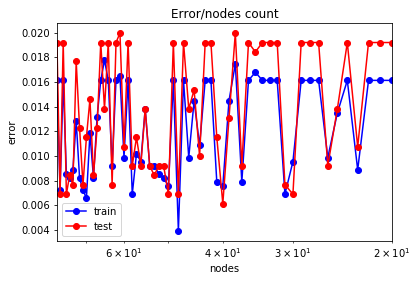

In [55]:
nodes_arr_1 = np.arange(20, 80, 1)
test_err = []
train_err = []
for nodes in nodes_arr_1:
    mlp_model = MLPClassifier(hidden_layer_sizes = (nodes,), solver = 'lbfgs',
                              activation = 'logistic', random_state = 54)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

print("Лучшее значение ошибки:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное количество нейронов:")
nodes_opt_1 = nodes_arr_1[test_err == min_test_err][0]
print(nodes_opt_1)

plt.semilogx(nodes_arr_1, train_err, 'b-o', label = 'train')
plt.semilogx(nodes_arr_1, test_err, 'r-o', label = 'test')
plt.xlim([np.max(nodes_arr_1), np.min(nodes_arr_1)])
plt.title('Error/nodes count')
plt.xlabel('nodes')
plt.ylabel('error')
plt.legend()
pass

Имеем: лучше всего брать для нейронной сети с одним скрытым слоем 40 нейронов. Честно говоря, график странный. Слишком много областей с переобучением(возможно это связано как раз с "любовью" однослойной сети к переобучению).

# Два скрытых слоя

Посмотрим эту же зависимость, но уже для сети с двумя скрытыми слоями

Лучшее значение ошибки:
(0.0042805400065854459, 0.004608294930875576)
Оптимальное количество нейронов:
47


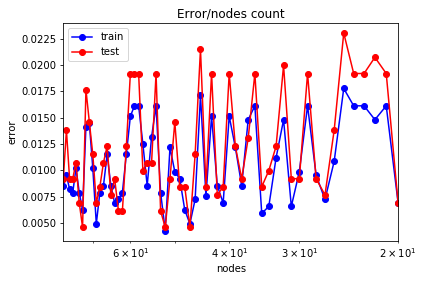

In [56]:
nodes_arr_2 = np.arange(20, 80, 1)
test_err = []
train_err = []
for nodes in nodes_arr_2:
    mlp_model = MLPClassifier(hidden_layer_sizes = (nodes, nodes), solver = 'lbfgs',
                              activation = 'logistic', random_state = 54)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

print("Лучшее значение ошибки:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное количество нейронов:")
nodes_opt_2 = nodes_arr_2[test_err == min_test_err][0]
print(nodes_opt_2)

plt.semilogx(nodes_arr_2, train_err, 'b-o', label = 'train')
plt.semilogx(nodes_arr_2, test_err, 'r-o', label = 'test')
plt.xlim([np.max(nodes_arr_2), np.min(nodes_arr_2)])
plt.title('Error/nodes count')
plt.xlabel('nodes')
plt.ylabel('error')
plt.legend()
pass

Почти везде(за редким исключением) наблюдаем переобучение. Создается ощущение, что нужно брать еще большее число скрытых слоев.

# Подбор параметра регуляризации alpha

Берем двуслойную сеть,  так как на тестовых данных она отработала лучше. Оптимальное количество нейронов в таком случае составляет 47 нейронов.

Лучшее значение ошибки:
(0.0046098123147843267, 0.0038402457757296467)
Оптимальное значение alpha:
0.00109854114199


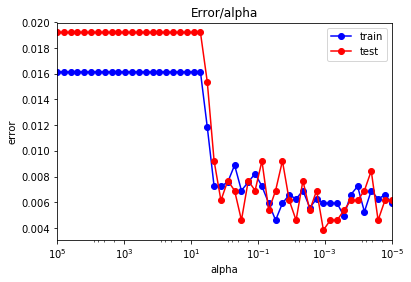

In [57]:
alpha_arr = np.logspace(-5, 5, 50)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (nodes_opt_2, nodes_opt_2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 54)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

print("Лучшее значение ошибки:")
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

print("Оптимальное значение alpha:")
alpha_opt = alpha_arr[test_err == min_test_err][0]
print(alpha_opt)

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error/alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

# Классификация с учетом оптимальных параметров.

Мы нашли оптимальное значение параметра альфа и наилучшее значенин количества нейронов для двуслойной нейронной сети. Проверим, какие результаты выдаст классификатор с найденными параметрами.

In [58]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (nodes_opt_2, nodes_opt_2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 54)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print("Ошибка на обучающей выборке: %s " %np.mean(y_train != y_train_pred))
print("Ошибка на тестовой выборке: %s " %np.mean(y_test != y_test_pred))

Ошибка на обучающей выборке: 0.00592690154758 
Ошибка на тестовой выборке: 0.00384024577573 


# Деревья

# Random Forest

Посмотрим результаты на Random Forest(случайный лес). Для этого используем ensemble. Поставим значение эстиматоров равное 300. Просто потому что число красивое. Позднее выберем наиболее оптимальное значение.

In [59]:
from sklearn import ensemble
n_estim = 300
rf_model=ensemble.RandomForestClassifier(n_estimators=n_estim,oob_score=True)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

Посчитаем ошибки на тестовой и обучающей выборке.

In [60]:
err_train=np.mean(y_train !=rf_model.predict(X_train))
err_test=np.mean(y_test !=rf_model.predict(X_test))
print(err_train,err_test)

(0.0, 0.0069124423963133645)


Получаем переобучение(делаем такой выбор, потому что ошибка на тесте больше ошибки на обучении). Но разница небольшая, так что возможно мы близки к оптимальному значению эстиматоров.

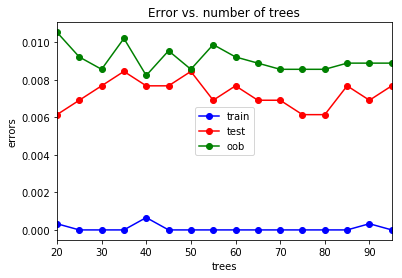

In [61]:
trees_arr=np.arange(20,100,5)
test_err=[]
train_err=[]
oob_err=[]
for trees in trees_arr:
    rf=ensemble.RandomForestClassifier(n_estimators=trees,oob_score=True)
    rf.fit(X_train, y_train)
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    oob_err.append(1-rf.oob_score_)
    
plt.plot(trees_arr,train_err,'b-o',label='train')
plt.plot(trees_arr,test_err,'r-o',label='test')
plt.plot(trees_arr,oob_err,'g-o',label='oob')
plt.xlim([np.min(trees_arr),np.max(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('errors')
plt.legend()
pass

Снова наблюдаем переобучение(синий график ниже красного.И значительно).Минимум oob-ошибки наблюдаем при количестве деревьев =40.

In [62]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.00614439324117


In [63]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[20 75 80]


Оптимальным количеством деревьев оказалось : 20,75 и 80 

# Extremely Randomized Trees

In [64]:
ert=ensemble.ExtraTreesClassifier(n_estimators=100).fit(X_train,y_train)

err_train=np.mean(y_train!=ert.predict(X_train))
err_test=np.mean(y_test!=ert.predict(X_test))

print(err_train,err_test)

(0.0, 0.009984639016897081)


Снова наблюдаем переобучение.(ошибка в бою больше ошибки на обучении). Выберем параметр деревьев получше

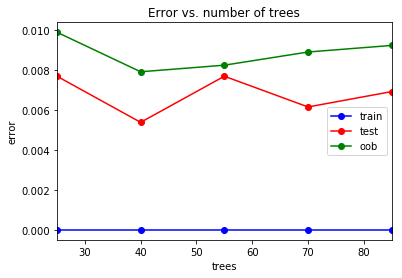

In [65]:
trees_arr=np.arange(25, 100, 15)
test_err=[]
train_err=[]
oob_err=[]
for trees in trees_arr:
    rf = ensemble.RandomForestClassifier(n_estimators=trees,oob_score=True)
    rf.fit(X_train,y_train)
    train_err.append(np.mean(y_train!=rf.predict(X_train)))
    test_err.append(np.mean(y_test!=rf.predict(X_test)))
    oob_err.append(1-rf.oob_score_)
    
plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.plot(trees_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(trees_arr), np.max(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

И снова наблюдаем переобучение.

In [66]:
min_train_err=np.min(train_err)
min_test_err=np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.00537634408602


Минимальное значение ошибки на тесте составляет почти 0.005. Попробуем найти оптимальное количество деревьев.

In [67]:
trees_opt=trees_arr[test_err==min_test_err]
print(trees_opt)

[40]


# AdaBoost

Пришло время любимого всеми АдаБуста

In [68]:
ada=ensemble.AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train,y_train)

err_train=np.mean(y_train!=ada.predict(X_train))
err_test=np.mean(y_test!=ada.predict(X_test))

print(err_train,err_test)

(0.0, 0.0069124423963133645)


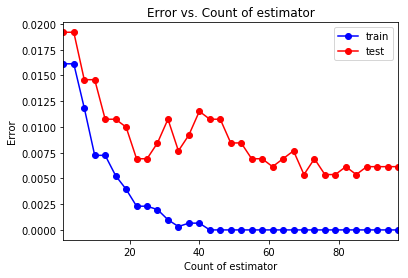

In [69]:
estimator_arr=np.arange(1,100,3)
test_err=[]
train_err=[]
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators=estimator)
    ab.fit(X_train,y_train)
    train_err.append(np.mean(y_train!=ab.predict(X_train)))
    test_err.append(np.mean(y_test!=ab.predict(X_test)))
    
plt.plot(estimator_arr,train_err,'b-o',label='train')
plt.plot(estimator_arr,test_err,'r-o',label='test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

Снова наблюдаем переобучение. По мере увеличения количества деревьем, разрыв между ошибкой на тесте и на обучении увеличивается. Найдем минимальное значение ошибки и оптимальное число деревьев.

In [70]:
min_train_err=np.min(train_err)
min_test_err=np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.00537634408602


In [71]:
estimator_opt=estimator_arr[test_err==min_test_err]
print(estimator_opt)

[70 76 79 85]


Оптимальное число деревьев для адабуста составляет 70,76,79 и 85

# GBT


In [72]:
gbt=ensemble.GradientBoostingClassifier(n_estimators=1000)
gbt.fit(X_train,y_train)

err_train=np.mean(y_train!=gbt.predict(X_train))
err_test=np.mean(y_test!=gbt.predict(X_test))

print(err_train,err_test)

(0.0, 0.0061443932411674347)


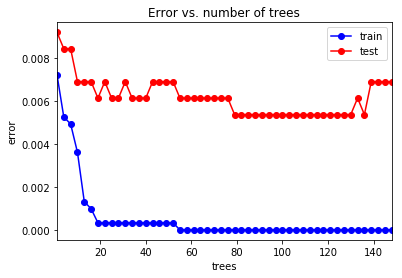

In [73]:
trees_arr = np.arange(1,150, 3)
test_err=[]
train_err=[]
for trees in trees_arr:
    gbt=ensemble.GradientBoostingClassifier(n_estimators=trees)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train!=gbt.predict(X_train)))
    test_err.append(np.mean(y_test!=gbt.predict(X_test)))

plt.plot(trees_arr, train_err, 'b-o', label = 'train')
plt.plot(trees_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(trees_arr), np.max(trees_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('trees')
plt.ylabel('error')
plt.legend()
pass

Наблюдаем переобучение.Посмотрим минимальное значение ошибки. С помощью этих данных найдем оптимальное количество деревьев.

In [74]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print(min_train_err)
print(min_test_err)

0.0
0.00537634408602


In [75]:
trees_opt = trees_arr[test_err == min_test_err]
print(trees_opt)

[ 79  82  85  88  91  94  97 100 103 106 109 112 115 118 121 124 127 130
 136]


Победу в бою методов, связанных с деревьями одерживают AdaBoost и GTB с ошибкой на тесте в 0.00537634408602.


# Танцы с размерностью и PCA

Теперь поэксперементируем с размерностью и рассмотрим PCA. Вспомним нашу текущую размерность.

In [87]:
X.shape

(4339, 5)

В исходных данных 5 столбцов, попробуем сократить до 4(3 кажется уж совсем малым числом). Предварительно обучим PCA

In [88]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(X)
pca_x=pca.transform(X)
pca_x.shape

(4339L, 4L)

In [89]:
X_train,X_test,y_train,y_test=train_test_split(pca_x,y,test_size=0.33,random_state = 5)

Разбили вновь на тестувую и обучающую выборки. Для анализа попробуем прогнать через классификатор RandomForest. Берем количество деревьев равное 40(мы же уже нашли, что это оптимальное количество)

In [90]:
from sklearn import ensemble
rf=ensemble.RandomForestClassifier(n_estimators = 20)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [91]:
err_train=np.mean(y_train!= rf.predict(X_train))
err_test=np.mean(y_test!= rf.predict(X_test))

print("TrainError", err_train)
print("TestError", err_test)

('TrainError', 0.00068799449604403163)
('TestError', 0.013268156424581005)


Благодаря сокращению размерности мы увеличили значение ошибки на тестовой выборке с 0.006144 до 0.013...
На тренировочной выросла с 0 до 0.0006. Переобучение всё еще наблюдаем.
Построим график зависимости ошибки на тестовой и обучающей выборках от количества компонент.Вдруг сработает длядругого количества компонент

In [92]:
components_arr = np.arange(1, 6, 1)
test_err = []
train_err = []
oob_err = []
for number in components_arr:
    pca = PCA(n_components = number)
    pca.fit(X)
    pca_x = pca.transform(X)
    pca_x_train, pca_x_test, y_train, y_test = train_test_split(pca_x, y, test_size = 0.33, random_state = 1)
    rf = ensemble.RandomForestClassifier(n_estimators = 40, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)


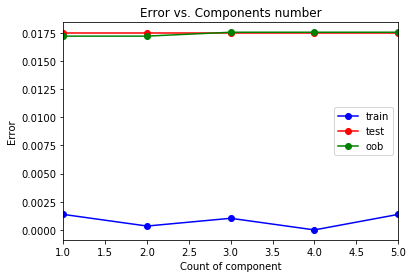

In [93]:
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(components_arr), np.max(components_arr)])
plt.title('Error vs. Components number')
plt.xlabel('Count of component')
plt.ylabel('Error')
plt.legend()
pass

Видно, что переобучение одинаково почти для всех параметров компонен.

In [94]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Min trainError", min_train_err)
print("Min testError", min_test_err)

('Min trainError', 0.0)
('Min testError', 0.017458100558659217)


In [95]:
opt_components_num = components_arr[test_err == min_test_err]
print(opt_components_num)

[1 2 3 4 5]


Оптимальное количество количество компонент для конкретного случая 1,2,3,4,5 (в некоторых запусках выдавал 1,3,4 или 5).
Создается впечатление, что при рассмотрении другого классификатора PCA даст больше пользы.